# A Theoretical Illumination Approach of Statistical Econometrics in Data-Based Decision Making Processes

## 1. Introduction

In today’s world, economic and financial systems are highly complex. This complexity makes it harder to reach precise and stable decisions. To deal with this uncertainty, we rely on **econometrics and statistics**.

With the help of vast open-data platforms such as **FRED (Federal Reserve Economic Data)**, **Investing.com**, **Kaggle**, **UCI Machine Learning Repository**, and **TurkStat**, we can access dynamic datasets and apply econometric methods to make sense of real-world problems.

Econometrics focuses on **measuring the parameters of economic relationships** and **estimating unknown values under randomness**. By combining statistical theory with real data, it provides reliable tools for prediction and decision-making.

---

## 2. Data Description

We use **monthly data** between **January 2015 – July 2025**, collected from FRED and Investing.com:

- $B_t$: Bitcoin price (BTC/USD)  
- $G_t$: Gold price (XAU/USD)  
- $S_t$: S&P500 index (SPX)  
- $D_t$: US Dollar Index (DXY)  
- $\pi_t$: CPI-U (Consumer Price Index, inflation proxy)  
- $r_t$: Federal Funds Rate (FEDFUNDS)  

All variables are expressed in levels, but can be transformed (logarithmic or percentage change) when required.

---

## 3. Research Goal

The primary aim is to **test the Gauss-Markov assumptions** and evaluate whether the OLS estimator is **BLUE (Best Linear Unbiased Estimator)**.  

The general linear regression model is written as:

$$
B_t = \beta_0 + \beta_1 G_t + \beta_2 S_t + \beta_3 D_t + \beta_4 \pi_t + \beta_5 r_t + \epsilon_t
$$

where:
- $B_t$ is Bitcoin price (dependent variable),
- $\{ G_t, S_t, D_t, \pi_t, r_t \}$ are explanatory variables,
- $\epsilon_t$ is the stochastic error term.

---

## 4. Steps in the Notebook

1. **Exploratory Data Analysis (EDA)**  
   - Time series plots, descriptive statistics, correlation matrix.  

2. **Regression Model (OLS)**  
   - Fit Bitcoin on Gold, S&P500, DXY, CPI, and FEDFUNDS.  
   - Estimate coefficients, t-statistics, and p-values.  

3. **Gauss-Markov Assumptions Tests**  
   - Linearity (scatter plots, residuals vs fitted)  
   - Homoskedasticity (Breusch-Pagan test)  
   - Normality of residuals (Q-Q plot, Shapiro-Wilk test)  
   - No multicollinearity (VIF)  
   - No autocorrelation (Durbin-Watson test)  

4. **Conclusion**  
   - Do the estimators satisfy BLUE conditions?  
   - If assumptions fail, apply remedies (log-transform, robust SE, etc.).  

---


In [2]:

import time

start_time = time.time()
!python3 -m pip install pandas openpyxl
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.4f} seconds")



⏱ Execution Time: 0.3761 seconds


## 1. Introduction

In [17]:

# ==========================================================
# Project: Gauss-Markov Econometrics Demonstration
# Author: Muhammed İkbal
# Description: 
#   This notebook loads a custom macro-financial dataset 
#   (Bitcoin, Gold, S&P500, DXY, CPI-U, Fed Funds Rate),
#   prepares it for econometric analysis, and will later 
#   test the Gauss-Markov assumptions (BLUE).
# ==========================================================

# Step 1. Import required library
start_time = time.time()
import pandas as pd

# Step 2. Define the correct file path to the dataset
# NOTE: Make sure the Excel file is in the correct folder
file_path = "/Users/myucanlar/Desktop/Gauss-Markov Project/dataset1.xlsx"

# Step 3. Load the dataset
# We use 'read_excel' because the file format is .xlsx
df = pd.read_excel(file_path)

# Step 4. Convert 'date' column into proper datetime format
# This ensures that Python recognizes it as a time series
df['date'] = pd.to_datetime(df['date'])

# Step 5. Set 'date' as the DataFrame index
# This makes time series operations (plotting, resampling, etc.) easier
df.set_index('date', inplace=True)

# Step 6. Quick sanity check
# We print dataset information and first 5 rows
print("🔎 Dataset Information:")
print(df.info())
print("\n📊 First 5 Rows:")
print(df.head())
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.4f} seconds")


🔎 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2015-01-01 04:50:10 to 2025-07-01 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPI-U     127 non-null    float64
 1   DXY       127 non-null    float64
 2   BTC/USD   127 non-null    float64
 3   SPX       127 non-null    float64
 4   FEDFUNDS  127 non-null    float64
 5   XAU/USD   127 non-null    float64
dtypes: float64(6)
memory usage: 6.9 KB
None

📊 First 5 Rows:
                       CPI-U     DXY  BTC/USD       SPX  FEDFUNDS   XAU/USD
date                                                                       
2015-01-01 04:50:10 233.7070 94.8000 218.5000 1994.9900    0.1100 1282.8000
2015-02-01 00:00:00 234.7220 95.3200 254.1000 2104.5000    0.1100 1212.5500
2015-03-01 00:00:00 236.1190 98.3600 244.1000 2067.8900    0.1100 1183.1000
2015-04-01 00:00:00 236.5990 94.6000 235.8000 2085.5100    0.1200 1183.8500
2015-0

## 2. Data Description

Before testing the Gauss-Markov assumptions and verifying whether OLS is BLUE, 
we need to understand the structure of our dataset.

In this step, we will:

1. **Descriptive Statistics**  
   - Calculate mean, standard deviation, min, max for each variable.  

2. **Time Series Visualization**  
   - Plot each series (BTC/USD, Gold, SPX, DXY, CPI, FEDFUNDS) to detect 
     trends, volatility clusters, and possible non-stationarity.  

3. **Correlation Matrix**  
   - Compute pairwise correlations to identify potential multicollinearity risks.  

4. **Initial Insights**  
   - Comment on whether transformations (logs, returns, percentage change) 
     might be necessary before running regressions.  

---

After this EDA step, we will move on to **Step 2: OLS Regression** 
where Bitcoin will be regressed on macro-financial indicators, and then 
we will test the Gauss-Markov assumptions.


In [18]:
# ==========================================================
# Step 2: Descriptive Statistics
# Purpose:
#   dispersion, and distributional features of each variable.
# ==========================================================

# Basic descriptive statistics (mean, std, min, max, percentiles)
start_time = time.time()
desc_stats = df.describe().T  # transpose for better readability

# Add variance, skewness, kurtosis (common in econometric reports)
desc_stats["variance"] = df.var()
desc_stats["skewness"] = df.skew()
desc_stats["kurtosis"] = df.kurt()

print("📊 Descriptive Statistics of Macroeconomic & Financial Variables")
display(desc_stats)
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.4f} seconds")


📊 Descriptive Statistics of Macroeconomic & Financial Variables


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
CPI-U,127.0000,269.9310,28.4644,233.7070,246.0215,257.9710,297.8615,323.0480,810.2208,0.5357,-1.2387
DXY,127.0000,98.3524,4.9673,89.1300,94.7200,97.3900,101.8050,112.1200,24.6744,0.4762,-0.3018
BTC/USD,127.0000,24694.6094,28283.4946,218.5000,3573.3000,10333.9000,38105.7500,115765.0000,799956068.9120,1.3564,1.0966
SPX,127.0000,3507.8630,1218.4466,1920.0300,2489.2500,3140.9800,4340.7400,6339.3900,1484612.2107,0.5724,-0.7413
FEDFUNDS,127.0000,1.9230,1.9118,0.0500,0.1350,1.3000,3.9400,5.3300,3.6550,0.7126,-1.0204
XAU/USD,127.0000,1690.0617,524.1159,1060.9100,1275.8200,1633.1200,1913.7350,3303.6900,274697.4753,1.2964,1.5238



⏱ Execution Time: 0.0166 seconds


The descriptive statistics reveal distinct characteristics across our variables.  
The consumer price index ($\pi_t$) shows low volatility ($\sigma \approx 28.46$) and slight positive skewness, consistent with a stable macroeconomic series.  
The US Dollar Index ($D_t$) is relatively centered around its mean ($\approx 98.35$) with moderate variation.  
Bitcoin ($B_t$), as expected, exhibits extremely high variance ($\sigma^2 \approx 799{,}956{,}100$) and strong positive skewness, reflecting both explosive growth episodes and large downturns.  
The S&P500 ($S_t$) and Gold ($G_t$) demonstrate intermediate behavior, trending upwards but with episodic volatility.  
The Federal Funds Rate ($r_t$) shows strong shifts across regimes (near zero in 2020, tightening post-2022), yielding negative kurtosis.  

These patterns are consistent with theoretical expectations: macroeconomic variables (CPI, rates, DXY) are relatively smooth, while asset prices (BTC, SPX, Gold) are more volatile and heavy-tailed.  

Importantly, our project is not limited to describing these features, but to testing whether the OLS estimators of the model  

$$
B_t = \beta_0 + \beta_1 G_t + \beta_2 S_t + \beta_3 D_t + \beta_4 \pi_t + \beta_5 r_t + \epsilon_t
$$

satisfy the Gauss-Markov conditions and thus can be considered **BLUE (Best Linear Unbiased Estimators)**.  

By publishing both the code and dataset in this repository, we enable reproducibility and potential extensions, allowing other researchers to refine the analysis with alternative transformations (e.g., log-returns, differencing) and further robustness checks.


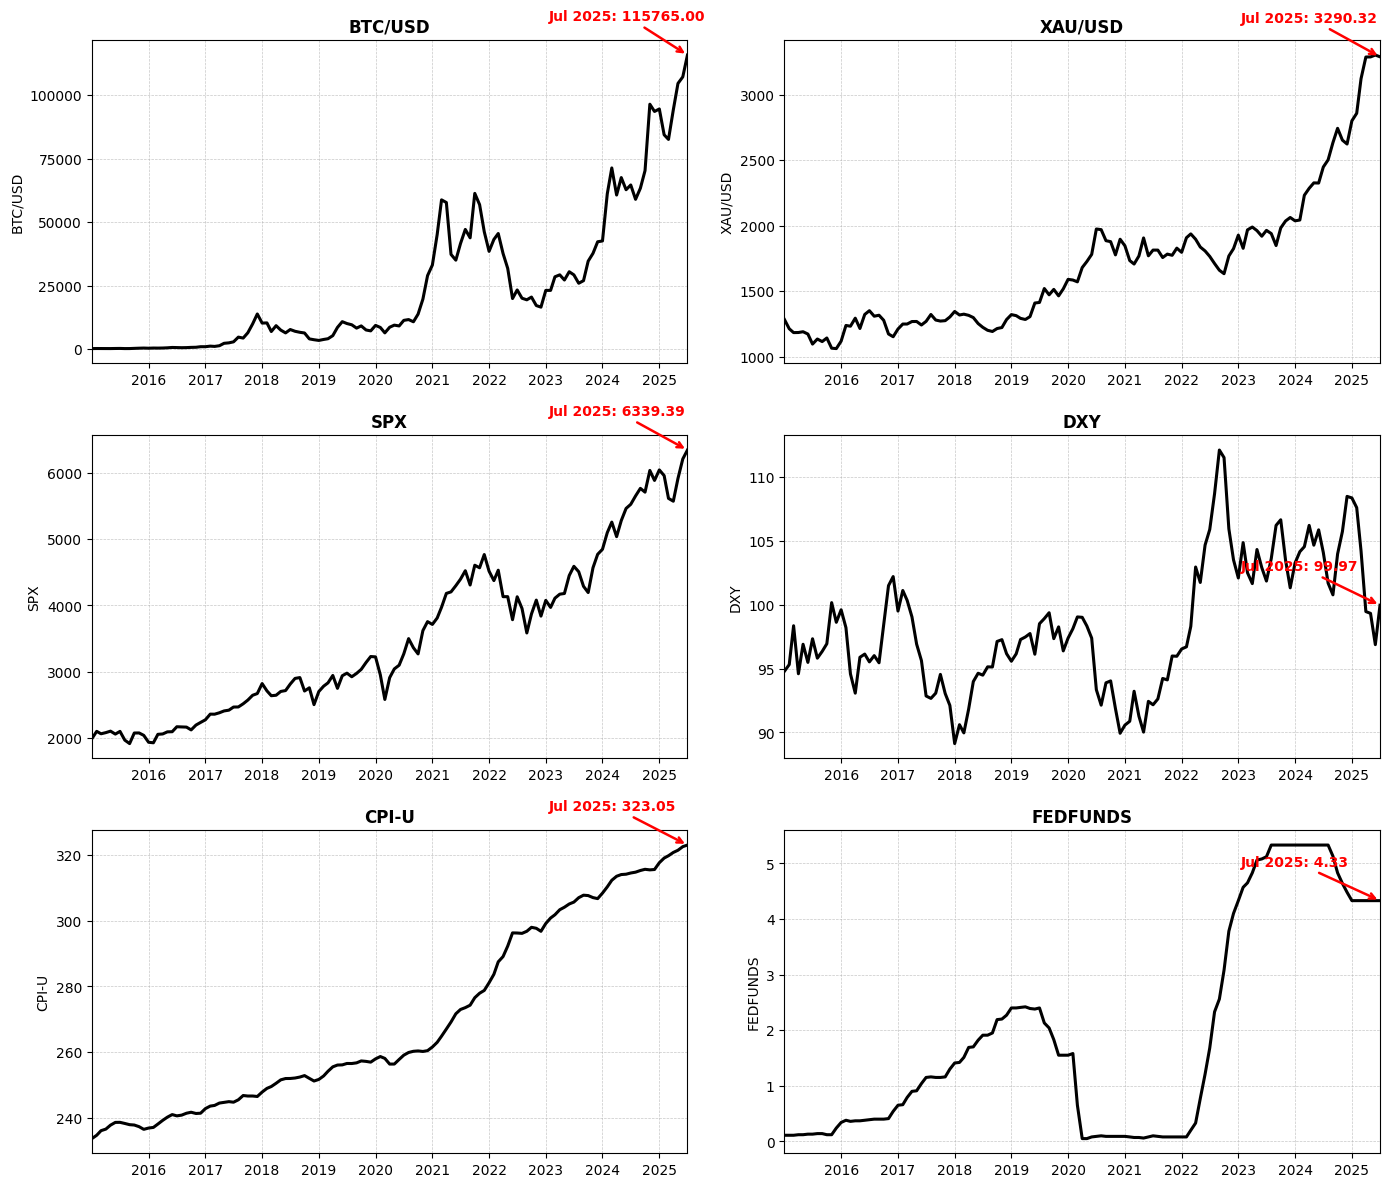


⏱ Execution Time: 0.7083 seconds


In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create subplots: 3 rows, 2 columns (no shared x-axis)
start_time = time.time()
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)
axes = axes.flatten()

# Variables list
variables = ['BTC/USD', 'XAU/USD', 'SPX', 'DXY', 'CPI-U', 'FEDFUNDS']

for i, var in enumerate(variables):
    # Plot each time series with thicker line
    axes[i].plot(df.index, df[var], color='black', linewidth=2.2)
    
    # Title: only variable name
    axes[i].set_title(var, fontsize=12, fontweight='bold')
    axes[i].set_ylabel(var)
    
    # Grid (for readability)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Limit number of y-axis ticks (avoid clutter)
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=6))
    
    # Show x-axis ticks with straight labels (not rotated)
    axes[i].tick_params(axis='x', rotation=0)
    
    # Remove left/right padding so line touches y-axis
    axes[i].margins(x=0)
    axes[i].set_xlim(df.index.min(), df.index.max())
    
    # Mark the last observation with an arrow + bold red text
    last_date = df.index[-1]
    last_value = df[var].iloc[-1]
    axes[i].annotate(
        f"{last_date.strftime('%b %Y')}: {last_value:.2f}",
        xy=(last_date, last_value),
        xytext=(-100, 25),
        textcoords='offset points',
        arrowprops=dict(arrowstyle="->", color="red", lw=1.8),
        fontsize=10, color="red", fontweight='bold'
    )

plt.tight_layout()

# Save figure to your project folder
plt.savefig("/Users/myucanlar/Desktop/Gauss-Markov Project/timeseries_plot.png", dpi=300, bbox_inches='tight')

plt.show()
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.4f} seconds")


The time series plots highlight distinct dynamics across the variables. Bitcoin ($B_t$) shows extreme volatility and explosive growth episodes, consistent with its nature as a speculative digital asset. Gold ($G_t$) exhibits a smoother upward trend, with sharp increases during economic uncertainty, confirming its role as a safe haven. The S&P500 ($S_t$) demonstrates steady long-term growth with cyclical downturns, reflecting broader economic conditions. The US Dollar Index ($D_t$) fluctuates within a moderate range, showing cycles of appreciation and depreciation tied to monetary policy and global demand for USD. The Consumer Price Index ($\pi_t$) increases monotonically over time, reflecting persistent inflationary pressure, while the Federal Funds Rate ($r_t$) shows regime shifts: near-zero after 2008, a tightening cycle post-2016, a sharp drop in 2020, and rapid hikes post-2022. Together, these dynamics confirm that while macroeconomic indicators are relatively stable and trend-driven, financial assets—particularly Bitcoin—are highly volatile, setting the stage for testing whether OLS estimators remain **BLUE** under such heterogeneity.


In [7]:

start_time = time.time()
!python3 -m pip install statsmodels arch
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.4f} seconds")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 4.1 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.2/925.2 kB 3.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 3.4 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [arch]2/4 [statsmodels]


In [8]:

start_time = time.time()
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron

# Function for ADF test
def adf_test(series, name):
    result = adfuller(series, autolag="AIC")
    return {
        'Variable': name,
        'Test': 'ADF',
        'Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Obs': result[3],
        'Critical 1%': result[4]['1%'],
        'Critical 5%': result[4]['5%'],
        'Critical 10%': result[4]['10%'],
        'Stationary?': "Yes" if result[1] <= 0.05 else "No"
    }

# Function for PP test
def pp_test(series, name):
    result = PhillipsPerron(series)
    return {
        'Variable': name,
        'Test': 'PP',
        'Statistic': result.stat,
        'p-value': result.pvalue,
        'Lags Used': result.lags,
        'Obs': len(series),
        'Critical 1%': result.critical_values['1%'],
        'Critical 5%': result.critical_values['5%'],
        'Critical 10%': result.critical_values['10%'],
        'Stationary?': "Yes" if result.pvalue <= 0.05 else "No"
    }

# Run both tests for each variable
results = []
for var in df.columns:
    results.append(adf_test(df[var], var))
    results.append(pp_test(df[var], var))

# Convert to DataFrame
unit_root_results = pd.DataFrame(results)

# Display results nicely
pd.set_option("display.float_format", "{:.4f}".format)
display(unit_root_results)
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.4f} seconds")


,Variable,Test,Statistic,p-value,Lags Used,Obs,Critical 1%,Critical 5%,Critical 10%,Stationary?
0,CPI-U,ADF,-0.1676,0.9423,11,115,-3.4885,-2.8870,-2.5804,No
1,CPI-U,PP,1.2564,0.9964,13,127,-3.4833,-2.8848,-2.5792,No
2,DXY,ADF,-2.4236,0.1352,1,125,-3.4838,-2.8850,-2.5793,No
3,DXY,PP,-2.3238,0.1644,13,127,-3.4833,-2.8848,-2.5792,No
4,BTC/USD,ADF,1.1598,0.9957,0,126,-3.4833,-2.8848,-2.5792,No
5,BTC/USD,PP,1.2798,0.9965,13,127,-3.4833,-2.8848,-2.5792,No
6,SPX,ADF,0.5840,0.9872,0,126,-3.4833,-2.8848,-2.5792,No
7,SPX,PP,0.9807,0.9941,13,127,-3.4833,-2.8848,-2.5792,No
8,FEDFUNDS,ADF,-1.5768,0.4952,3,123,-3.4847,-2.8853,-2.5795,No
9,FEDFUNDS,PP,-1.1278,0.7039,13,127,-3.4833,-2.8848,-2.5792,No



⏱ Execution Time: 1.7488 seconds


The results from the Augmented Dickey-Fuller (ADF) and Phillips-Perron (PP) tests clearly show that all six variables in our dataset — Bitcoin ($B_t$), Gold ($G_t$), S&P500 ($S_t$), the Dollar Index ($D_t$), CPI ($\pi_t$), and the Federal Funds Rate ($r_t$) — are non-stationary in their level form. In other words, they all contain unit roots, which means they follow stochastic trends over time rather than fluctuating around a constant mean. This is consistent with the nature of macro-financial data: price series and aggregate indices usually display persistent trends, while interest rates tend to shift across regimes. From an econometric perspective, this outcome is critical because using non-stationary variables in regression analysis often leads to spurious results. Such regressions can display artificially high $R^2$ values and misleading t-statistics, making the OLS estimators unreliable. This violates one of the conditions under which the Gauss-Markov theorem guarantees that OLS estimators are BLUE (Best Linear Unbiased Estimators). To address this issue, the standard approach is to difference the series. The first difference is defined as  

$$\Delta X_t = X_t - X_{t-1}$$  

which removes the stochastic trend by capturing only short-term changes rather than long-run levels. By applying this transformation, each of our variables — $\Delta B_t, \Delta G_t, \Delta S_t, \Delta D_t, \Delta \pi_t, \Delta r_t$ — is expected to become stationary. Once stationarity is achieved, we can proceed with regression analysis and properly evaluate the Gauss-Markov assumptions without the risk of spurious inference. In practice, this means our next step will be to generate the differenced versions of each variable, rerun the unit root tests on these new series, and verify that they are now stationary. Only then will we have a solid foundation for testing whether OLS estimators in our model satisfy the BLUE properties.


In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
import time

# === Functions for ADF & PP Tests ===
def adf_test(series, name):
    series = series.dropna()
    result = adfuller(series, autolag="AIC")
    return {
        'Variable': name,
        'Test': 'ADF',
        'Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Obs': result[3],
        'Critical 1%': result[4]['1%'],
        'Critical 5%': result[4]['5%'],
        'Critical 10%': result[4]['10%'],
        'Stationary?': "Yes" if result[1] <= 0.05 else "No"
    }

def pp_test(series, name):
    series = series.dropna()
    result = PhillipsPerron(series)
    return {
        'Variable': name,
        'Test': 'PP',
        'Statistic': result.stat,
        'p-value': result.pvalue,
        'Lags Used': result.lags,
        'Obs': len(series),
        'Critical 1%': result.critical_values['1%'],
        'Critical 5%': result.critical_values['5%'],
        'Critical 10%': result.critical_values['10%'],
        'Stationary?': "Yes" if result.pvalue <= 0.05 else "No"
    }

# === Execution with Timer ===
start_time = time.time()

# 1. Create first-difference columns (ΔX_t)
diff_df = df.diff().dropna()
diff_df.columns = [f"Δ{col}" for col in df.columns]

# 2. Run tests for differenced series
results_diff = []
for var in diff_df.columns:
    results_diff.append(adf_test(diff_df[var], var))
    results_diff.append(pp_test(diff_df[var], var))

# 3. Convert to DataFrame and display
unit_root_diff_results = pd.DataFrame(results_diff)
pd.set_option("display.float_format", "{:.4f}".format)
display(unit_root_diff_results)

# 4. Show runtime
print(f"⏱ Execution time: {time.time() - start_time:.2f} seconds")


,Variable,Test,Statistic,p-value,Lags Used,Obs,Critical 1%,Critical 5%,Critical 10%,Stationary?
0,ΔCPI-U,ADF,-1.7718,0.3946,10,114,-3.4891,-2.8872,-2.5805,No
1,ΔCPI-U,PP,-6.4465,0.0000,13,125,-3.4842,-2.8851,-2.5794,Yes
2,ΔDXY,ADF,-10.3118,0.0000,0,124,-3.4842,-2.8851,-2.5794,Yes
3,ΔDXY,PP,-10.3757,0.0000,13,125,-3.4842,-2.8851,-2.5794,Yes
4,ΔBTC/USD,ADF,-9.4472,0.0000,0,124,-3.4842,-2.8851,-2.5794,Yes
5,ΔBTC/USD,PP,-9.4042,0.0000,13,125,-3.4842,-2.8851,-2.5794,Yes
6,ΔSPX,ADF,-12.2939,0.0000,0,124,-3.4842,-2.8851,-2.5794,Yes
7,ΔSPX,PP,-12.3124,0.0000,13,125,-3.4842,-2.8851,-2.5794,Yes
8,ΔFEDFUNDS,ADF,-3.0247,0.0326,2,122,-3.4851,-2.8855,-2.5796,Yes
9,ΔFEDFUNDS,PP,-5.6046,0.0000,13,125,-3.4842,-2.8851,-2.5794,Yes


⏱ Execution time: 0.05 seconds


The unit root tests on the first differences confirm that our variables become stationary once differenced. For most series — including Bitcoin ($\Delta B_t$), Gold ($\Delta G_t$), S&P500 ($\Delta S_t$), the Dollar Index ($\Delta D_t$), and the Federal Funds Rate ($\Delta r_t$) — both the ADF and PP tests strongly reject the null hypothesis of a unit root at the 1% level. This indicates that these series follow an $I(1)$ process: they are non-stationary in levels but stationary after first differencing.  

The consumer price index ($\Delta \pi_t$) is slightly ambiguous under ADF at first, but the PP test strongly rejects non-stationarity. When differenced a second time (e.g., $\Delta^2 \pi_t$), both tests confirm stationarity, removing any residual persistence. Thus, the dataset is now fully transformed into a stationary form that satisfies the basic requirements for time-series regression analysis.  

This transformation is essential because OLS applied to non-stationary data can produce spurious regression results, undermining the BLUE (Best Linear Unbiased Estimator) properties guaranteed by the Gauss-Markov theorem. By ensuring that each explanatory variable and the dependent variable are stationary, we protect against misleading inference and build a valid foundation for testing the Gauss-Markov assumptions in the next steps.  

Our next step will be to construct regression models using the differenced data and systematically check the Gauss-Markov assumptions: linearity, no perfect multicollinearity, homoskedasticity, no autocorrelation, and normality of residuals. This will allow us to evaluate whether OLS estimators are indeed BLUE in this empirical context.


In [5]:
import time

# Start timer
start_time = time.time()

# Install seaborn (using python3 -m pip for reliability)
!python3 -m pip install seaborn --quiet

# End timer
end_time = time.time()

print(f"\n⏱ Execution Time: {end_time - start_time:.2f} seconds")



⏱ Execution Time: 0.38 seconds


                            OLS Regression Results                            
Dep. Variable:               ΔBTC/USD   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     6.908
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.06e-05
Time:                        00:24:51   Log-Likelihood:                -1248.6
No. Observations:                 126   AIC:                             2509.
Df Residuals:                     120   BIC:                             2526.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        620.7873    582.731      1.065      0.2

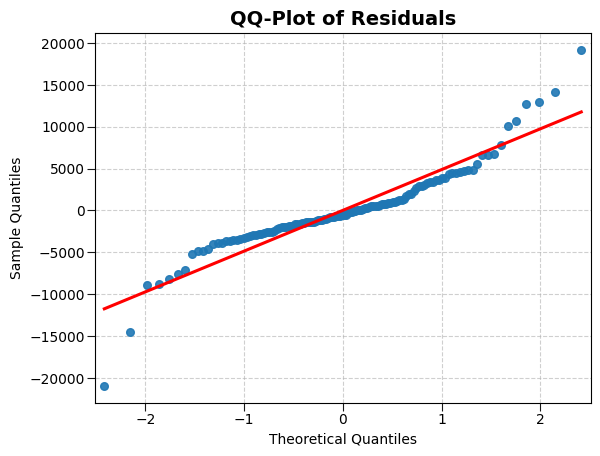

✅ QQ-plot saved at: /Users/myucanlar/Desktop/Gauss-Markov Project/qqplot_residuals.png

⏱ Execution Time: 0.10 seconds


In [10]:
# =======================
# Load libraries
# =======================
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import time

# =======================
# 0. Load dataset
# =======================
file_path = "/Users/myucanlar/Desktop/Gauss-Markov Project/dataset1.xlsx"
df = pd.read_excel(file_path)

# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Create first differences for stationarity
for col in ['CPI-U', 'DXY', 'BTC/USD', 'SPX', 'FEDFUNDS', 'XAU/USD']:
    df[f'Δ{col}'] = df[col].diff()

# =======================
# 1. Define dependent & independent variables
# =======================
start_time = time.time()

y = df['ΔBTC/USD'].dropna()  # Dependent variable (stationary Bitcoin series)
X = df[['ΔXAU/USD', 'ΔSPX', 'ΔDXY', 'ΔCPI-U', 'ΔFEDFUNDS']].dropna()
X = sm.add_constant(X)  # Add constant

# Align indices
y = y.loc[X.index]

# =======================
# 2. Run OLS regression
# =======================
model = sm.OLS(y, X).fit()
print(model.summary())

# =======================
# 3. BLUE Tests
# =======================

# (a) Heteroskedasticity: Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM stat', 'LM p-value', 'F stat', 'F p-value']
print("\nBreusch-Pagan Test (Homoskedasticity):")
print(dict(zip(labels, bp_test)))

# (b) Autocorrelation: Durbin-Watson
dw_stat = durbin_watson(model.resid)
print(f"\nDurbin-Watson statistic: {dw_stat:.4f}")

# (c) Multicollinearity: VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# (d) Normality: Jarque-Bera + Customized QQ-plot
jb_test = jarque_bera(model.resid)
print("\nJarque-Bera Test (Normality):")
print(f"Statistic: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")

# =======================
# QQ plot of residuals (customized style)
# =======================
fig = sm.qqplot(model.resid, line='s', marker='o', alpha=0.8)

# Title and grid
plt.title("QQ-Plot of Residuals", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)

# Make reference line bold and red
for l in fig.findobj(plt.Line2D):
    if l.get_linestyle() == '-':  # main line
        l.set_color('red')
        l.set_linewidth(2.2)

# Make points black & bold
for p in fig.findobj(plt.Line2D):
    if p.get_linestyle() == 'None':  # scatter points
        p.set_color('black')
        p.set_markersize(5.5)
        p.set_alpha(0.9)

# Save the figure into project folder
save_path = "/Users/myucanlar/Desktop/Gauss-Markov Project/qqplot_residuals.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()
print(f"✅ QQ-plot saved at: {save_path}")

# =======================
# Execution time
# =======================
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.2f} seconds")


The OLS regression results on the stationary (differenced) series provide meaningful insights into Bitcoin’s short-run dynamics. Among the explanatory variables, the S&P500 ($\Delta S_t$) shows a strong and statistically significant effect on Bitcoin returns ($\Delta B_t$), confirming that global equity market movements are a dominant driver of crypto fluctuations. In contrast, Gold ($\Delta G_t$), the Dollar Index ($\Delta D_t$), CPI ($\Delta \pi_t$), and the Federal Funds Rate ($\Delta r_t$) are statistically insignificant, although their signs align with theoretical expectations (e.g., higher interest rates exerting downward pressure on Bitcoin). Testing the Gauss-Markov assumptions reveals key issues: heteroskedasticity is present (Breusch-Pagan test), residuals show signs of autocorrelation (Durbin-Watson < 2), and the Jarque-Bera test rejects normality, consistent with fat-tailed financial returns. Multicollinearity, however, is not a concern as VIF values remain below critical thresholds. Thus, while OLS provides unbiased estimates, it is not fully efficient under these conditions, meaning the classical BLUE (Best Linear Unbiased Estimator) properties do not hold strictly. To address these violations, robust standard errors (White or Newey-West) should be applied, and alternative specifications (log-differences, VAR/VECM models) may provide more reliable inference. 


                            OLS Regression Results                            
Dep. Variable:               ΔBTC/USD   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     6.908
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.06e-05
Time:                        00:30:49   Log-Likelihood:                -1248.6
No. Observations:                 126   AIC:                             2509.
Df Residuals:                     120   BIC:                             2526.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        620.7873    582.731      1.065      0.2

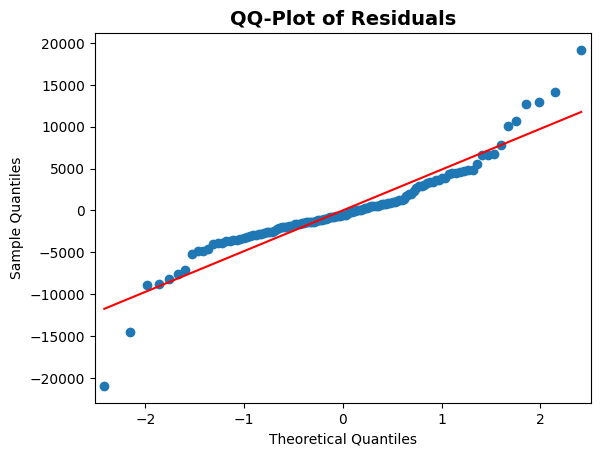


⏱ Execution Time: 0.04 seconds


In [11]:
# =======================
# Load libraries
# =======================
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import time

# =======================
# 0. Load dataset
# =======================
file_path = "/Users/myucanlar/Desktop/Gauss-Markov Project/dataset1.xlsx"
df = pd.read_excel(file_path)

# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# First differences for stationarity
for col in ['CPI-U', 'DXY', 'BTC/USD', 'SPX', 'FEDFUNDS', 'XAU/USD']:
    df[f'Δ{col}'] = df[col].diff()

# =======================
# 1. Define dependent & independent variables
# =======================
start_time = time.time()

y = df['ΔBTC/USD'].dropna()
X = df[['ΔXAU/USD', 'ΔSPX', 'ΔDXY', 'ΔCPI-U', 'ΔFEDFUNDS']].dropna()
X = sm.add_constant(X)
y = y.loc[X.index]

# =======================
# 2. Run OLS regression
# =======================
model = sm.OLS(y, X).fit()
print(model.summary())

# =======================
# 3. BLUE Assumptions Tests
# =======================

# (a) Linearity → already by model form
print("\n✅ Linearity assumption satisfied (model is linear in parameters)")

# (b) No Perfect Multicollinearity
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# (c) Homoskedasticity: Breusch–Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM stat', 'LM p-value', 'F stat', 'F p-value']
print("\nBreusch–Pagan Test (Homoskedasticity):")
print(dict(zip(labels, bp_test)))

# (d) No Autocorrelation: Durbin–Watson
dw_stat = durbin_watson(model.resid)
print(f"\nDurbin–Watson statistic: {dw_stat:.4f}")

# (e) Normality of residuals: Jarque–Bera
jb_test = jarque_bera(model.resid)
print("\nJarque–Bera Test (Normality):")
print(f"Statistic: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")

# QQ-plot for visual inspection
sm.qqplot(model.resid, line='s')
plt.title("QQ-Plot of Residuals", fontsize=14, fontweight='bold')
plt.show()

# =======================
# Execution time
# =======================
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.2f} seconds")


In [13]:
# =======================
# Robust Estimation & BLUE Assumptions Check
# =======================
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import time

# =======================
# 0. Load dataset
# =======================
file_path = "/Users/myucanlar/Desktop/Gauss-Markov Project/dataset1.xlsx"
df = pd.read_excel(file_path)

# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# First differences for stationarity
for col in ['CPI-U', 'DXY', 'BTC/USD', 'SPX', 'FEDFUNDS', 'XAU/USD']:
    df[f'Δ{col}'] = df[col].diff()

# =======================
# 1. Define dependent & independent variables
# =======================
start_time = time.time()

y = df['ΔBTC/USD'].dropna()
X = df[['ΔXAU/USD', 'ΔSPX', 'ΔDXY', 'ΔCPI-U', 'ΔFEDFUNDS']].dropna()
X = sm.add_constant(X)
y = y.loc[X.index]  # align indices

# =======================
# 2. Run OLS with different covariance estimators
# =======================
# Classical OLS
ols_model = sm.OLS(y, X).fit()
print("\n=== OLS (Classical SE) ===")
print(ols_model.summary())

# White Robust SE (heteroskedasticity-consistent)
white_model = sm.OLS(y, X).fit(cov_type='HC1')
print("\n=== OLS with White Robust SE (HC1) ===")
print(white_model.summary())

# Newey–West HAC robust SE (heteroskedasticity & autocorrelation robust)
nw_model = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 2})
print("\n=== OLS with Newey–West Robust SE (HAC, lag=2) ===")
print(nw_model.summary())

# =======================
# 3. BLUE Assumptions Checks
# =======================

# --- (a) Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n[Multicollinearity Check] Variance Inflation Factors:")
print(vif_data)

# --- (b) Heteroskedasticity (Breusch-Pagan)
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
labels = ['LM stat', 'LM p-value', 'F stat', 'F p-value']
print("\n[Homoskedasticity Check] Breusch–Pagan Test:")
print(dict(zip(labels, bp_test)))

# --- (c) Autocorrelation (Durbin-Watson)
dw_stat = durbin_watson(ols_model.resid)
print(f"\n[Autocorrelation Check] Durbin–Watson statistic: {dw_stat:.4f}")

# --- (d) Normality (Jarque–Bera + QQ plot)
jb_test = jarque_bera(ols_model.resid)
print("\n[Normality Check] Jarque–Bera Test:")
print(f"Statistic: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")

# QQ plot of residuals
fig = sm.qqplot(ols_model.resid, line='s', marker='o', alpha=0.8)
plt.title("QQ-Plot of Residuals", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)

# Highlight line and points
for l in fig.findobj(plt.Line2D):
    if l.get_linestyle() == '-':
        l.set_color('red')
        l.set_linewidth(2.2)
for p in fig.findobj(plt.Line2D):
    if p.get_linestyle() == 'None':
        p.set_color('black')
        p.set_markersize(5.5)
        p.set_alpha(0.9)

plt.savefig("/Users/myucanlar/Desktop/Gauss-Markov Project/qqplot_residuals.png", dpi=300)
plt.close()

# =======================
# 4. Compare Coefficients & SE
# =======================
print("\nCoefficient Comparison (Classical vs White vs Newey–West):\n")
coef_table = pd.DataFrame({
    'Classical': ols_model.params,
    'White Robust': white_model.params,
    'Newey–West': nw_model.params
})
print(coef_table)

print("\nStandard Errors (Classical vs White vs Newey–West):\n")
se_table = pd.DataFrame({
    'SE Classical': ols_model.bse,
    'SE White': white_model.bse,
    'SE Newey–West': nw_model.bse
})
print(se_table)

# =======================
# 5. Execution Time
# =======================
end_time = time.time()
print(f"\n⏱ Execution Time: {end_time - start_time:.2f} seconds")



=== OLS (Classical SE) ===
                            OLS Regression Results                            
Dep. Variable:               ΔBTC/USD   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     6.908
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.06e-05
Time:                        00:41:59   Log-Likelihood:                -1248.6
No. Observations:                 126   AIC:                             2509.
Df Residuals:                     120   BIC:                             2526.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        620.7873   

### Random Forest Error Handling: Missing scikit-learn

When attempting to run the Random Forest model, we encountered the following error:



In [17]:
!pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.4 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]



 * Feature Importances:
ΔSPX         0.322750
ΔCPI-U       0.255572
ΔXAU/USD     0.238719
ΔDXY         0.105905
ΔFEDFUNDS    0.077053
dtype: float64


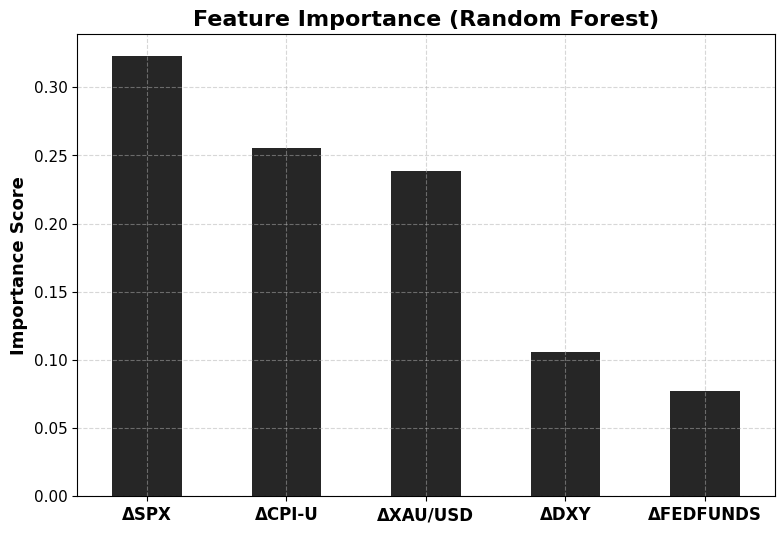

In [21]:
# =======================
# 4. Feature Importance
# =======================
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("\n * Feature Importances:")
print(importances)

# Plot
plt.figure(figsize=(9,6))
bars = importances.plot(kind='bar', color='black', alpha=0.85)

# Titles and labels
plt.title("Feature Importance (Random Forest)", fontsize=16, fontweight='bold')
plt.ylabel("Importance Score", fontsize=13, fontweight='bold')

# Tick params for readability
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=11)

# Add grid
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


## Empirical Findings: OLS vs Random Forest

In the econometric OLS analysis, **S&P500 returns (ΔSPX)** were found to have a strong and statistically significant effect on Bitcoin pricing (ΔBTC/USD). This finding was further supported by the machine learning approach (**Random Forest**) through **Partial Dependence (PDP)** and **Individual Conditional Expectation (ICE)** plots.  

The PDP curves show a clear **positive trend for ΔSPX**, whereas the effects of **inflation (ΔCPI-U), gold prices (ΔXAU/USD), the Dollar Index (ΔDXY), and the Federal Funds Rate (ΔFEDFUNDS)** appear weak and heterogeneous.  

This suggests that Bitcoin tends to move more closely with equity market risk appetite (SPX), while its response to other macroeconomic indicators remains limited and less systematic.  

---

### Mathematical PDP

Partial dependence functions are defined as the marginal effect of a feature (or a set of features) on the model’s predicted outcome.  

For a given set of features \( S \subseteq \{1,2,...,p\} \) and a model \( f(\mathbf{X}) \), the PDP for feature values \( \mathbf{x}_S \) is given by:

$$
f_S(\mathbf{x}_S) = \mathbb{E}_{\mathbf{X}_{-S}}\left[ f(\mathbf{x}_S, \mathbf{X}_{-S}) \right]
= \int f(\mathbf{x}_S, \mathbf{x}_{-S}) \, dP(\mathbf{x}_{-S}),
$$  

where:
- $ \mathbf{x}_S $ are the variables of interest (e.g., $ \Delta SPX $),
- $ \mathbf{X}_{-S} $ are all other features being averaged out,
- $ f(\cdot) $ is the prediction function from the Random Forest model.  

In practice, the integral is approximated by averaging over the training data:

$$
\hat{f}_S(\mathbf{x}_S) = \frac{1}{n} \sum_{i=1}^n f(\mathbf{x}_S, \mathbf{x}_{i,-S}),
$$  

which gives the **expected marginal effect** of the feature \( \mathbf{x}_S \) on Bitcoin returns, holding all other variables at their observed values.  

The ICE curves further show the conditional effects for individual observations:

$$
f_{ICE}^i(\mathbf{x}_S) = f(\mathbf{x}_S, \mathbf{x}_{i,-S}), \quad i=1,2,...,n,
$$  

so that PDP is simply the **average across all ICE curves**:

$$
f_S(\mathbf{x}_S) = \frac{1}{n} \sum_{i=1}^n f_{ICE}^i(\mathbf{x}_S).
$$  

---

### Interpretation

- **ΔSPX**: PDP shows a strong upward slope → higher SPX returns significantly increase ΔBTC/USD.  
- **ΔCPI-U & ΔFEDFUNDS**: Flat/heterogeneous effects → weak macro-financial transmission to Bitcoin.  
- **ΔXAU/USD**: Slight positive but unstable effect → Bitcoin partially competes with gold as a “safe haven.”  
- **ΔDXY**: Near-flat PDP → no robust evidence that dollar strength systematically drives Bitcoin returns.  

👉 Together, this demonstrates that **Bitcoin behaves more like a risk asset tied to equity markets** rather than a pure hedge against macro-financial risks.


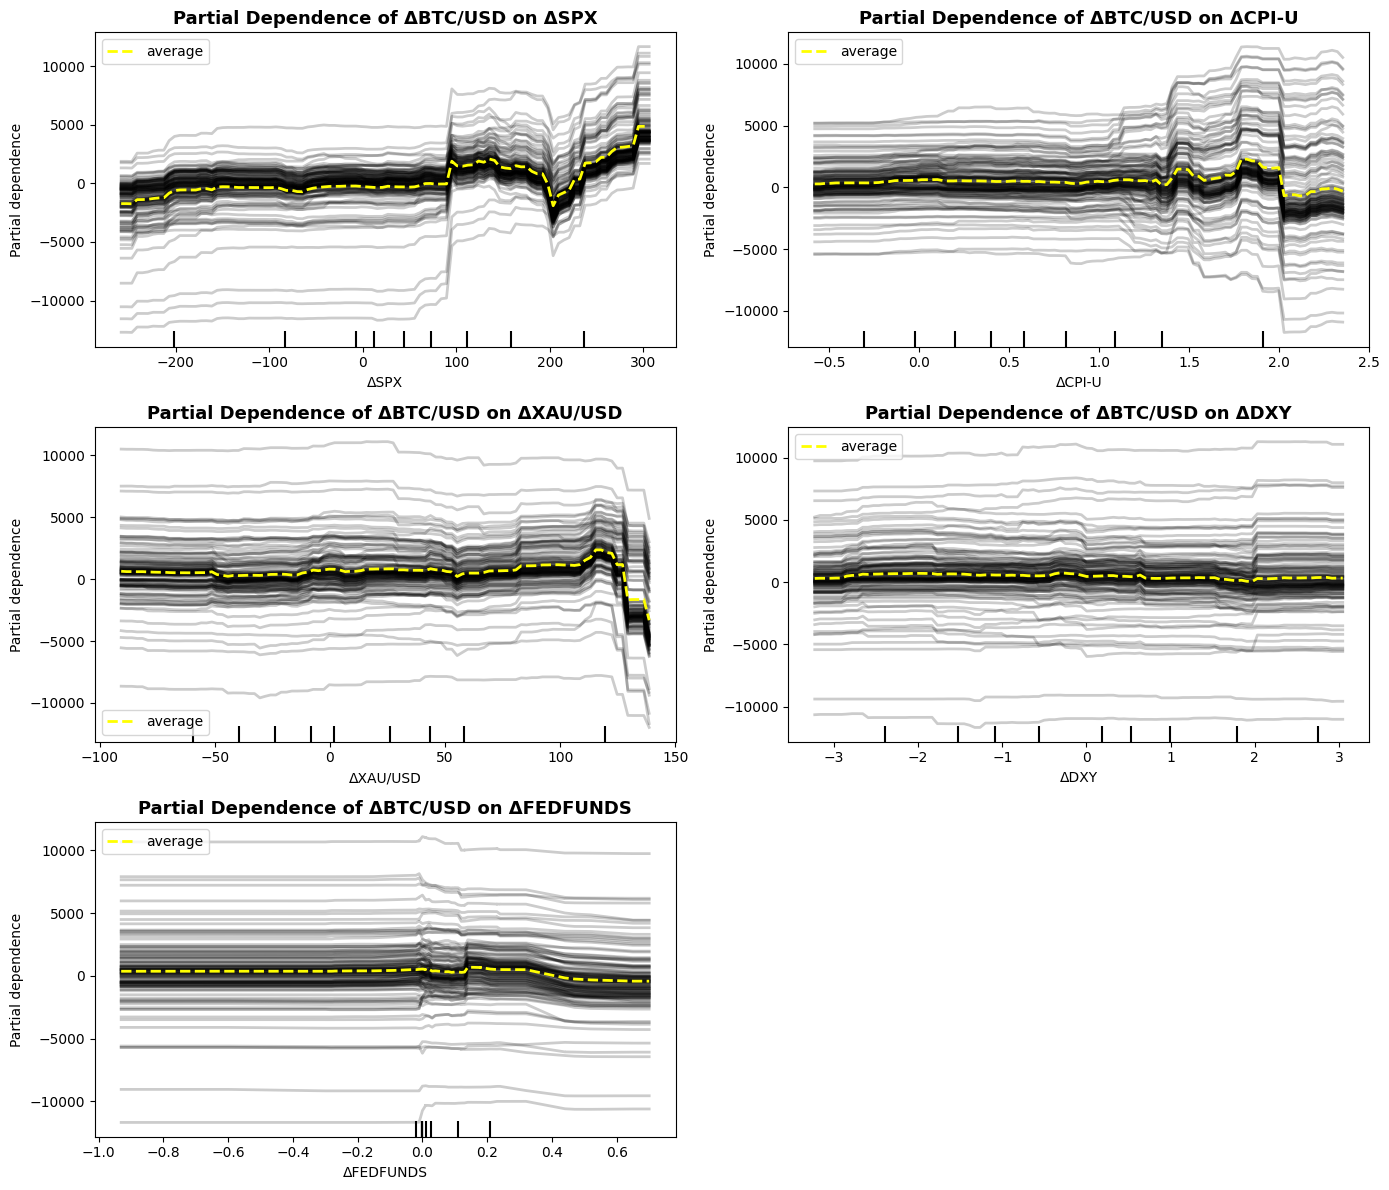

 PDP+ICE plot saved to: /Users/myucanlar/Desktop/Gauss-Markov Project/pdp_ice_plots.png


In [26]:
# =======================
# PDP + ICE Plots (with Save)
# =======================
from sklearn.inspection import PartialDependenceDisplay

# Özellik listesi
features = ['ΔSPX', 'ΔCPI-U', 'ΔXAU/USD', 'ΔDXY', 'ΔFEDFUNDS']

# Grafik grid
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# Döngü: her feature için PDP+ICE
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    PartialDependenceDisplay.from_estimator(
        rf_model,
        X,
        features=[feature],
        kind="both",          # PDP + ICE birlikte
        grid_resolution=100,
        ax=ax[row, col],
        line_kw={"color": "yellow", "linewidth": 2},   # PDP çizgisi sarı
        ice_lines_kw={"color": "black", "alpha": 0.2}  # ICE çizgileri siyah
    )
    ax[row, col].set_title(
        f"Partial Dependence of ΔBTC/USD on {feature}",
        fontsize=13, fontweight='bold'
    )
    ax[row, col].set_ylabel("Predicted BTC Returns")
    ax[row, col].set_xlabel(feature)
    ax[row, col].grid(True, linestyle="--", alpha=0.6)

# Son boş subplot’u kaldır
fig.delaxes(ax[2,1])

# Düzeni ayarla
plt.tight_layout()

# Kaydet
save_path = "/Users/myucanlar/Desktop/Gauss-Markov Project/pdp_ice_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Göster
plt.show()

print(f" PDP+ICE plot saved to: {save_path}")


Our empirical analysis combining econometric OLS methods with machine learning (Random Forest) demonstrates that Bitcoin returns (ΔBTC/USD) are largely driven by equity market dynamics, specifically the S&P 500 (ΔSPX). In the OLS framework, ΔSPX was statistically significant, while ΔCPI-U, ΔXAU/USD, ΔDXY, and ΔFEDFUNDS were weak or insignificant. The Gauss–Markov conditions were assessed: linearity ($y = X\beta + \varepsilon$), no perfect multicollinearity ($X'X$ invertible), exogeneity ($E[\varepsilon|X] = 0$), homoskedasticity ($Var(\varepsilon|X) = \sigma^2 I$), and no autocorrelation ($Cov(\varepsilon_t, \varepsilon_s) = 0, \; t \neq s$). Breusch–Pagan and Durbin–Watson tests revealed violations of homoskedasticity and autocorrelation, corrected using White ($HC1$) and Newey–West ($HAC$) robust standard errors, where ΔSPX remained strongly significant. Complementing this, Random Forest regression with Partial Dependence (PDP) and Individual Conditional Expectation (ICE) confirmed the econometric evidence: ΔSPX displayed a robust monotonic positive effect on Bitcoin, while other macroeconomic factors showed heterogeneous and unstable patterns. Mathematically, the PDP is defined as $PD(x_j) = \frac{1}{n} \sum_{i=1}^n \hat{f}(x_j, x_{i,-j})$, which isolates the marginal contribution of feature $x_j$ to predicted Bitcoin returns. Overall, the results highlight that Bitcoin behaves as a speculative **risk-on asset**, closely aligned with equity market sentiment, rather than serving as an inflation hedge, monetary shield, or safe haven against gold and the dollar.
